# BigMart Sales Data Analysis 

BigMart collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

In [1]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
%matplotlib inline

# 1- Gathering Data

In [2]:
#read data
big_mart = pd.read_csv('big_mart.csv')

In [3]:
%%html
<style>
table {float:left}
</style>

## Metadata

Column | Meaning 
:----- | :-----: 
Item_Identifier | Unique product ID 
Item_Weight | Weight of product 
Item_Fat_Content | Whether the product is low fat or not 
Item_Visibility | The % of total display area of all products in a store allocated to the particular product 
Item_Type | The category to which the product belongs 
Item_MRP | Maximum Retail Price (list price) of the product 
Outlet_Identifier | Unique store ID 
Outlet_Establishment_Year | The year in which store was established 
Outlet_Size | The size of the store in terms of ground area covered 
Outlet_Location_Type |	The type of city in which the store is located 
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket 
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

# 2- Assess Data

In [4]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Check duplicates
sum(big_mart.duplicated())

0

In [6]:
#check summary statistics
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#check data type and nulls
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#check unique values in categorical columns
cat_columns = big_mart.select_dtypes(include = [np.object]).columns[1:]
for column in cat_columns:
    print(column,":")
    print(big_mart[column].unique())
    print("*"*20)

Item_Fat_Content :
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
********************
Item_Type :
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
********************
Outlet_Identifier :
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
********************
Outlet_Size :
['Medium' nan 'High' 'Small']
********************
Outlet_Location_Type :
['Tier 1' 'Tier 3' 'Tier 2']
********************
Outlet_Type :
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
********************


### Assessing Result
- Missing Data in Item_weight and Outlet_size columns
- Item_visibility has zero values
- Unifiy Item_Fat_Content to Low Fat and Regular

## Check missing data pattern

In [9]:
#convert zero values in Item_Visibility to nulls
big_mart.loc[big_mart['Item_Visibility'] == 0, 'Item_Visibility'] = np.nan

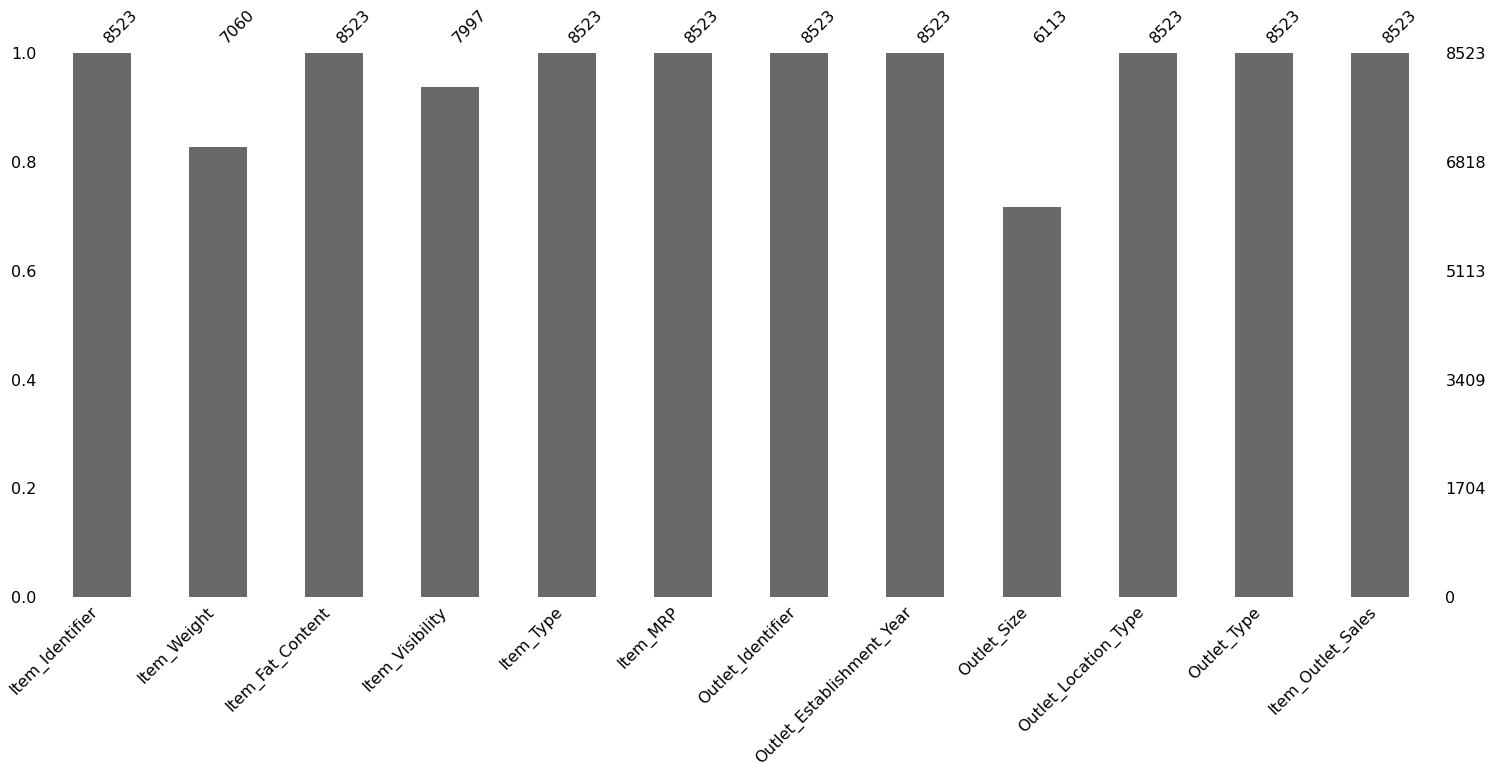

In [10]:
msno.bar(big_mart);

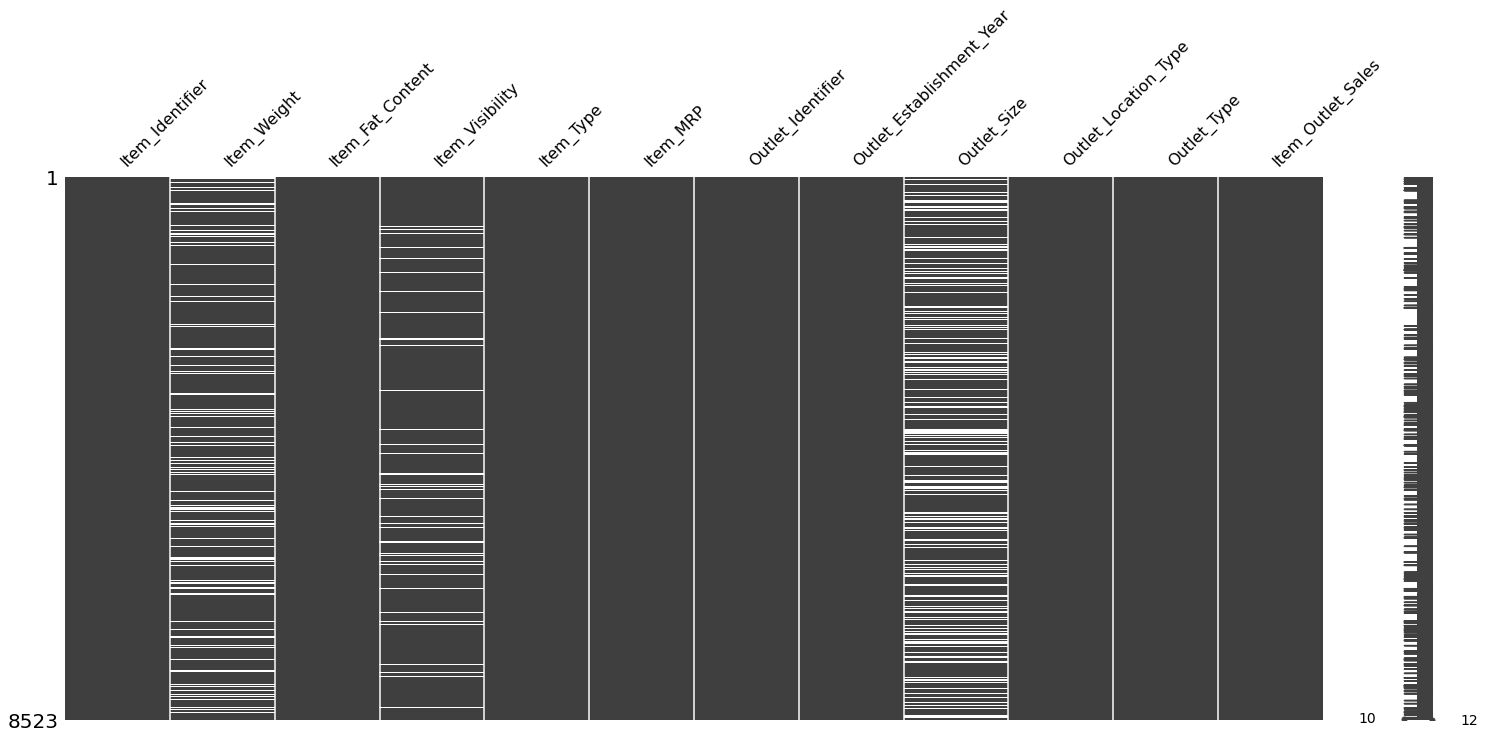

In [11]:
msno.matrix(big_mart);

In [12]:
#check if missing data has a relation with any column
#sort data on based on column and check missing graph
sorted = big_mart.sort_values('Outlet_Identifier')

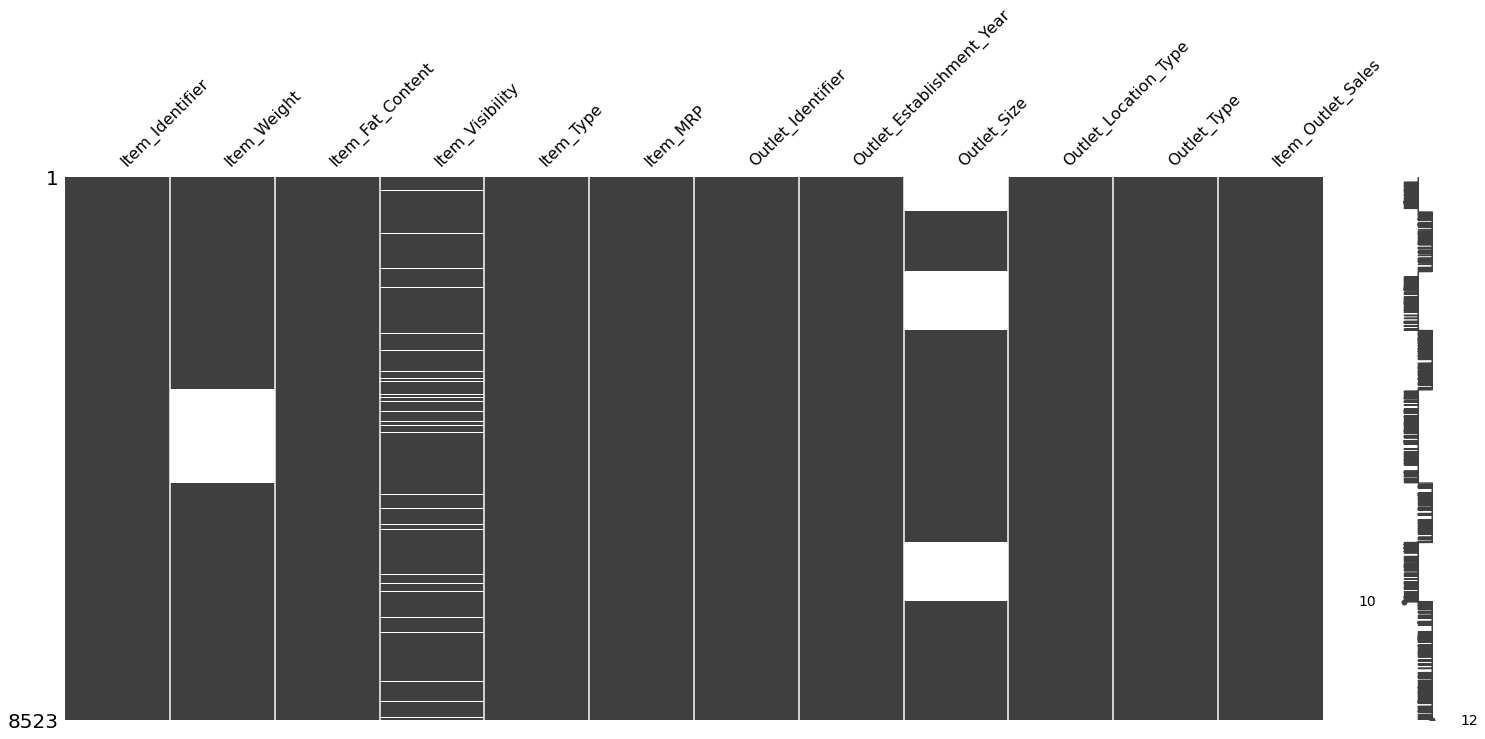

In [13]:
msno.matrix(sorted);

So it seems that missing for outlet size and item weigh data are exist for whole outlet

In [14]:
# Outlets that have missing data in Outlet_Size column
big_mart[big_mart['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [15]:
# Outlets that have missing data in Item_Weight column
big_mart[big_mart['Item_Weight'].isnull()]['Outlet_Identifier'].unique()

array(['OUT027', 'OUT019'], dtype=object)

# 3 - Data Cleaning

## 3.1- Missing Outlet Size
- Check if there is relation on our data features helps us in predict the missing outlet size

In [16]:
#total items per outlet
big_mart.groupby('Outlet_Identifier').size()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64

In [17]:
#total sales per outlet
big_mart.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT019,1.796941e+05
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
7,OUT045,2.036725e+06
8,OUT046,2.118395e+06
9,OUT049,2.183970e+06


In [18]:
#Check Outlet_Type vs Outlet_Id based on number of items
big_mart.groupby(['Outlet_Identifier','Outlet_Type']).size().unstack()

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Identifier,,,,
OUT010,555.0,NaN,NaN,NaN
OUT013,NaN,932.0,NaN,NaN
OUT017,NaN,926.0,NaN,NaN
OUT018,NaN,NaN,928.0,NaN
OUT019,528.0,NaN,NaN,NaN
OUT027,NaN,NaN,NaN,935.0
OUT035,NaN,930.0,NaN,NaN
OUT045,NaN,929.0,NaN,NaN
OUT046,NaN,930.0,NaN,NaN


We can notice that bot outlets OUT010 and OUT019 are common in below
- Have nearly the same items count
- Bote are Grocery Store
- Both acheived total sales in range 180 K

So, we can assume that OUT010 size is small

In [19]:
# set OUT010 Size to small
big_mart.loc[big_mart['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] = 'Small'

- Last check before assuming the size of remaing outlets (OUT017 and OUT054)

In [20]:
#Check Outlet_Type vs Outlet_Id based on number of items
big_mart.groupby(['Outlet_Identifier','Outlet_Type', 'Outlet_Size']).size().unstack()

,Outlet_Size,High,Medium,Small
Outlet_Identifier,Outlet_Type,,,
OUT010,Grocery Store,NaN,NaN,555.0
OUT013,Supermarket Type1,932.0,NaN,NaN
OUT018,Supermarket Type2,NaN,928.0,NaN
OUT019,Grocery Store,NaN,NaN,528.0
OUT027,Supermarket Type3,NaN,935.0,NaN
OUT035,Supermarket Type1,NaN,NaN,930.0
OUT046,Supermarket Type1,NaN,NaN,930.0
OUT049,Supermarket Type1,NaN,930.0,NaN


I will go to assume that OUT017 and OUT054 are Medium

In [21]:
big_mart.loc[big_mart['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'] = 'Medium'

In [22]:
big_mart.loc[big_mart['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'] = 'Medium'

## 3.2- Missing Item Weight

In [23]:
big_mart.groupby('Outlet_Identifier')['Item_Weight'].mean()

Outlet_Identifier
OUT010    12.913153
OUT013    13.006148
OUT017    12.826668
OUT018    12.873346
OUT019          NaN
OUT027          NaN
OUT035    12.829349
OUT045    12.649989
OUT046    12.866801
OUT049    12.917446
Name: Item_Weight, dtype: float64

- Items weights not exist in OUT019 and OUT027 only. may be during error during data collection
- Since both OUT010 and OUT019 are grocery, lets check if we can get missing item weigh in OUT019 from existing data in OUT010

In [24]:
#check first 10 items in OUT010
big_mart[big_mart['Outlet_Identifier'] == 'OUT010'].sort_values('Item_Identifier').head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.600,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Small,Tier 3,Grocery Store,283.6308
4130,DRA24,19.350,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Small,Tier 3,Grocery Store,327.5736
8371,DRA59,8.270,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Small,Tier 3,Grocery Store,185.0924
2479,DRB13,6.115,Regular,0.011791,Soft Drinks,189.0530,OUT010,1998,Small,Tier 3,Grocery Store,948.7650
8063,DRB25,12.300,Low Fat,0.116261,Soft Drinks,107.0938,OUT010,1998,Small,Tier 3,Grocery Store,214.3876
2944,DRB48,16.750,Regular,0.041600,Soft Drinks,40.9822,OUT010,1998,Small,Tier 3,Grocery Store,157.1288
2796,DRC25,5.730,Low Fat,0.075943,Soft Drinks,85.5882,OUT010,1998,Small,Tier 3,Grocery Store,171.7764
6656,DRC27,13.800,Low Fat,0.097252,Dairy,245.7802,OUT010,1998,Small,Tier 3,Grocery Store,245.6802
6159,DRD15,10.600,Low Fat,0.095065,Dairy,232.4642,OUT010,1998,Small,Tier 3,Grocery Store,697.0926
5834,DRD24,13.850,Low Fat,0.051545,Soft Drinks,142.5154,OUT010,1998,Small,Tier 3,Grocery Store,141.8154


In [25]:
#check first 10 items in OUT019
big_mart[big_mart['Outlet_Identifier'] == 'OUT019'].sort_values('Item_Identifier').head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
6179,DRA59,NaN,Regular,0.223985,Soft Drinks,186.2924,OUT019,1985,Small,Tier 1,Grocery Store,555.2772
1708,DRC25,NaN,Low Fat,0.079440,Soft Drinks,86.7882,OUT019,1985,Small,Tier 1,Grocery Store,85.8882
2950,DRD15,NaN,Low Fat,0.099442,Dairy,233.1642,OUT019,1985,Small,Tier 1,Grocery Store,697.0926
2766,DRD25,NaN,Low Fat,0.138270,Soft Drinks,111.6860,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
7602,DRD27,NaN,Low Fat,0.041741,Dairy,98.3042,OUT019,1985,Small,Tier 1,Grocery Store,198.4084
833,DRD60,NaN,Low Fat,0.065189,Soft Drinks,181.1634,OUT019,1985,Small,Tier 1,Grocery Store,181.7634
4726,DRE15,NaN,Low Fat,0.031140,Dairy,74.8012,OUT019,1985,Small,Tier 1,Grocery Store,303.6048
1252,DRE37,NaN,Low Fat,0.164966,Soft Drinks,189.4872,OUT019,1985,Small,Tier 1,Grocery Store,189.0872
108,DRE60,NaN,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160


Lets make sure that Item 'DRA24' has the same weight at all stores

In [26]:
big_mart[big_mart['Item_Identifier'] == "DRA24"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,Medium,Tier 2,Supermarket Type1,1146.5076
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Small,Tier 3,Grocery Store,327.5736
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
8195,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436


So, we cna fill missing data using weight data from other stores 

In [27]:
#check how many items in all big mart stores
big_mart['Item_Identifier'].unique().size

1559

### This solution to show in steps how to fill missing weight data

In [28]:
#Collect all rows that have null item weight
null_weight = big_mart[(big_mart['Outlet_Identifier'] == 'OUT019') | (big_mart['Outlet_Identifier'] == 'OUT027')]

In [29]:
null_weight['Item_Identifier'].unique().size

1142

In [30]:
#Create empty dict for all item weighs and list for items with missign weight and not exist in other stores
items_weight = {}
unique_items_weight = []

In [31]:
#Creat a list with all items id used in big mart
all_items = big_mart['Item_Identifier'].unique()

In [32]:
len(all_items)

1559

In [33]:
#Iterate through all rows and get item as a key and weight as a value
#For any erros during getting the weight put these items in a list unique_items_weight
for item in all_items:
    if item not in items_weight:
        try:
            items_weight[item] = big_mart[big_mart['Item_Identifier'] == item]['Item_Weight'].mode()[0]
        except:
            unique_items_weight.append(item)


In [34]:
#check how many items in items_weight
len(items_weight)

1555

In [35]:
#check items that we couldn't get its weight
unique_items_weight

['FDN52', 'FDK57', 'FDE52', 'FDQ60']

In [36]:
#view the data of unique_items_weight
big_mart[big_mart['Item_Identifier'].isin (unique_items_weight)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- Couldn't get weight because they are unique items not exist in the other stores without missing weight data

In [37]:
#now lets impute missing weight based on data collected in items weight dictionary
#using the index for null_weight datafram we can access the need row in big_mart datafram
for index, row in null_weight.iterrows():
     
    try:
        big_mart.iloc[index,1] = items_weight[row['Item_Identifier']]
    except:
        pass


### This solution to show in steps how to fill missing weight data 

- Can be applied in a/m method but get the mean based on Item_Identifier


In [38]:
#get avg weight based on item type
avg_weight = big_mart.groupby('Item_Type')['Item_Weight'].mean()
avg_weight

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

In [39]:
#set the index to be Item Type
big_mart = big_mart.set_index('Item_Type')
#Fillna using avg_weight
big_mart['Item_Weight'] = big_mart['Item_Weight'].fillna(avg_weight)
#reset the index 
big_mart = big_mart.reset_index()


In [40]:
#check null values in Item_Weight
big_mart[big_mart['Item_Weight'].isna()]

,Item_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


## 3.3 - Item visiability

In [41]:
item_visib_mean = big_mart.groupby('Item_Identifier')['Item_Visibility'].mean()

In [42]:
big_mart = big_mart.set_index('Item_Identifier')

In [43]:
big_mart['Item_Visibility'] = big_mart['Item_Visibility'].fillna(item_visib_mean)

In [44]:
big_mart = big_mart.reset_index()

In [45]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Type                  8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 3.4  Item_Fat_Content values unifiying

In [46]:
big_mart['Item_Fat_Content'] = big_mart['Item_Fat_Content'].replace(['low fat', 'LF','reg'], ['Low Fat', 'Low Fat', 'Regular'])

In [47]:
#check
big_mart.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

# Exploratory Data Analysis

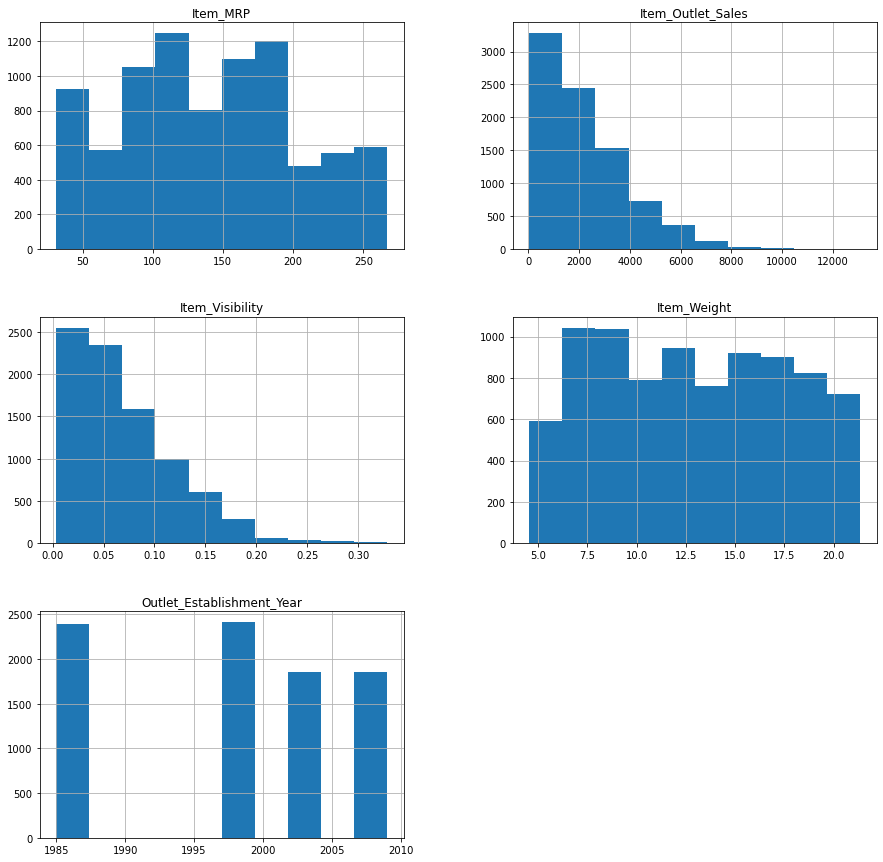

In [48]:
#Check distribution of data
big_mart.hist(figsize = (15,15));

## Q-1) what is the most selling items

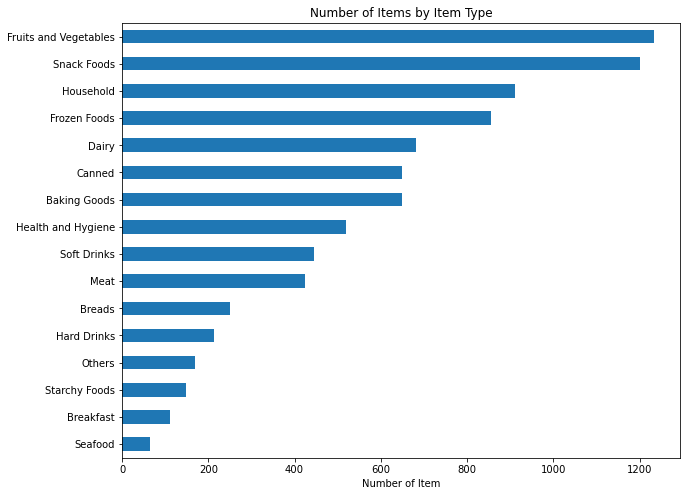

In [49]:
#show count of items types 
ax, fig = plt.subplots(figsize = (10,8))
ax = big_mart['Item_Type'].value_counts(ascending = True).plot.barh()

ax.set_xlabel('Number of Item')
ax.set_ylabel('')
ax.set_title('Number of Items by Item Type');

''

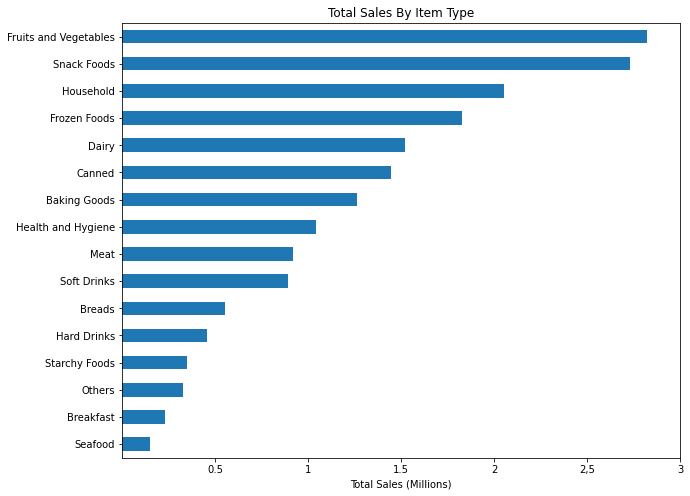

In [50]:
#show total sales by items types 
ax, fig = plt.subplots(figsize = (10,8))
ax = big_mart.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values().plot.barh()


ax.set_xlabel('Total Sales (Millions)')
ax.set_ylabel('')
ax.set_title('Total Sales By Item Type')
plt.xticks([5e5, 1e6, 1.5e6, 2e6, 2.5e6, 3e6], ['0.5', '1', '1.5', '2', '2,5', '3'])
;

- The item types Total sales matched with the order of number of items type sold

## Q-2 Which outlet have more sales?

''

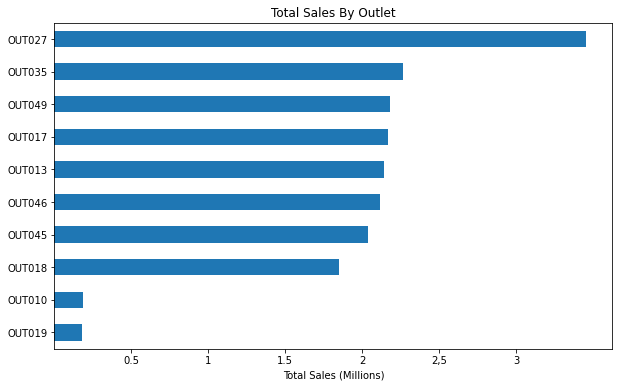

In [51]:
ax, fig = plt.subplots(figsize=(10,6))
ax = big_mart.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values().plot.barh()

ax.set_xlabel('Total Sales (Millions)')
ax.set_ylabel('')
ax.set_title('Total Sales By Outlet')
plt.xticks([5e5, 1e6, 1.5e6, 2e6, 2.5e6, 3e6], ['0.5', '1', '1.5', '2', '2,5', '3'])

   
;

- Outlet 27 has significant high total sales
- Outlet 10 and 19 have lower sales ammount as they are sell only grocery 

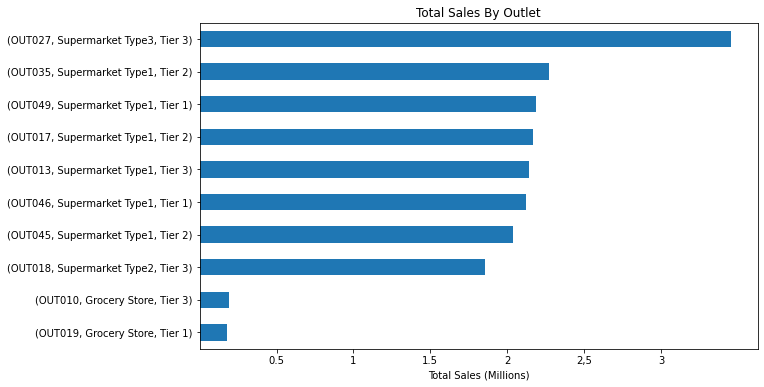

In [52]:
#add mor data to the y lables
ax, fig = plt.subplots(figsize=(10,6))
ax = big_mart.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].sum().sort_values().plot.barh()

ax.set_xlabel('Total Sales (Millions)')
ax.set_ylabel('')
ax.set_title('Total Sales By Outlet')
plt.xticks([5e5, 1e6, 1.5e6, 2e6, 2.5e6, 3e6], ['0.5', '1', '1.5', '2', '2,5', '3']);

## Q-3 Does outlet size impact the sales?

Text(0, 0.5, 'Outlet Size')

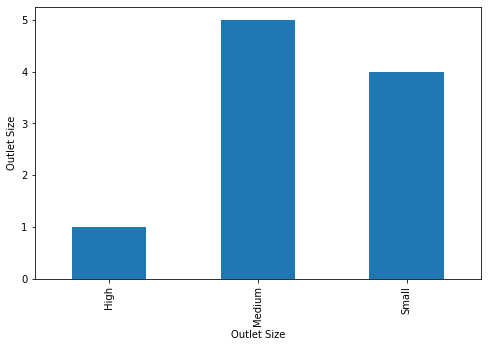

In [133]:
#number of outlets per its size
fig, ax = plt.subplots(figsize = (8,5))

ax = big_mart.groupby(['Outlet_Identifier','Outlet_Size']).size().unstack().notna().sum().plot(kind = 'bar')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Outlet Size');

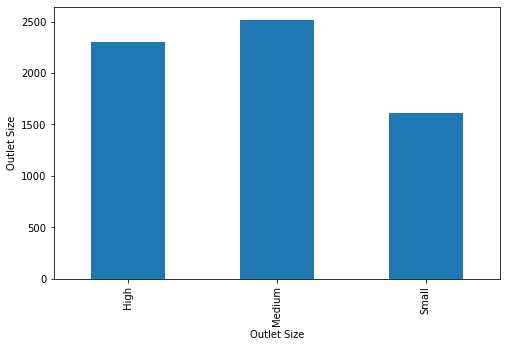

In [136]:
fig, ax = plt.subplots(figsize = (8,5))

ax = big_mart.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot(kind = 'bar')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Average Sales')
;

- Outlet with Medium size has more sales in average

## Q-4 Does outlet Location impact the sales?

''

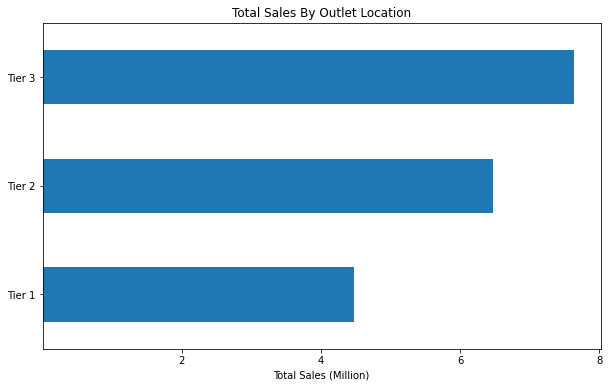

In [53]:
ax, fig = plt.subplots(figsize=(10,6))
ax = big_mart.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values().plot.barh()

ax.set_xlabel('Total Sales (Million)')
ax.set_ylabel('')
ax.set_title('Total Sales By Outlet Location')
plt.xticks([ 2e6, 4e6, 6e6, 8e6], ['2', '4', '6', '8'])
;

##### Note:
- This visual show incomplete info as number of outles in location Tier 3 is **FOUR** while other locations has **THREE** outlests

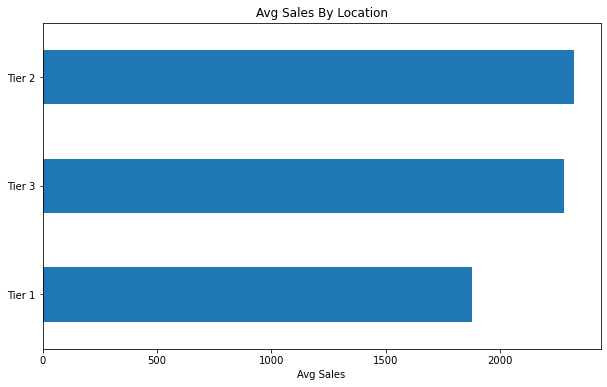

In [54]:
ax, fig = plt.subplots(figsize=(10,6))
ax = big_mart.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values().plot.barh()

ax.set_xlabel('Avg Sales')
ax.set_ylabel('')
ax.set_title('Avg Sales By Location');

- Outlets in Tier 2 and Tier 3 almost have the same average sales.

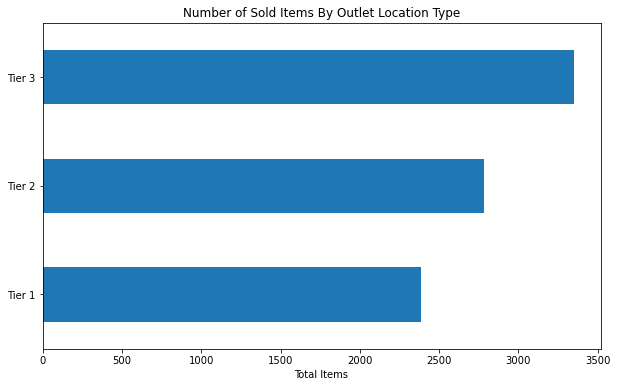

In [55]:
ax, fig = plt.subplots(figsize=(10,6))
ax = big_mart.Outlet_Location_Type.value_counts().sort_values().plot.barh()

ax.set_xlabel('Total Items')
ax.set_ylabel('')
ax.set_title('Number of Sold Items By Outlet Location Type');

- Tier 3 and Tire 2 have the same average sales despite Tier 2 selling less then Tier 3

## Q-5 Does Outlet Type impact the sales?

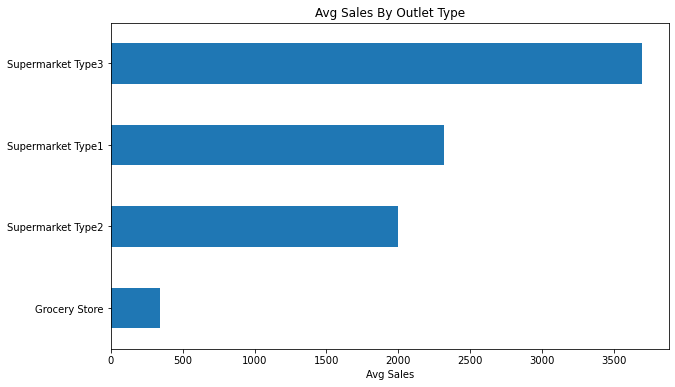

In [56]:
ax, fig = plt.subplots(figsize=(10,6))
ax = big_mart.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values().plot.barh()

ax.set_xlabel('Avg Sales')
ax.set_ylabel('')
ax.set_title('Avg Sales By Outlet Type');


- Supermarket Tire3 has the highest avg sales
- Grocery Store has the lowest avg sales

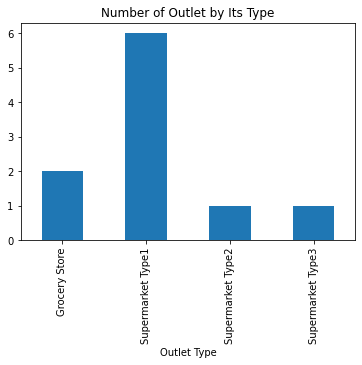

In [67]:
#number of outlet types
big_mart.groupby(['Outlet_Identifier', 'Outlet_Type'])['Outlet_Type'].size().unstack().notna().sum().plot(kind = 'bar')
plt.xlabel('Outlet Type')
plt.title('Number of Outlet by Its Type');

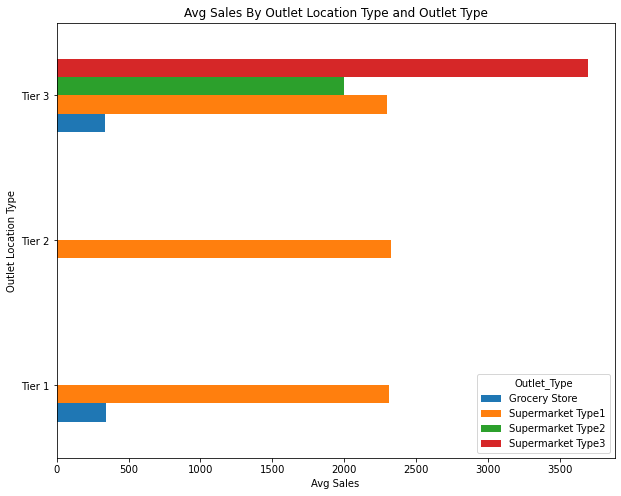

In [108]:
#Outlet average sales per tire and type
big_mart.groupby(['Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].mean().unstack().plot(kind = 'barh', 
                                                                                                   figsize = (10,8),)

plt.xlabel('Avg Sales')
plt.ylabel('Outlet Location Type')
plt.title('Avg Sales By Outlet Location Type and Outlet Type');

- Most of BigMart Stores are Supermarket Type 1
- Location Tier 3 has all Outlet Types and Supermarket Type 3 has a clear difference in average sales more than Type 2 and Type 1
- Supermarket Type1  and Grocery Store has the same average sales regardless its location

## Q-6 What is the relation between Item Visiability and Total Sales

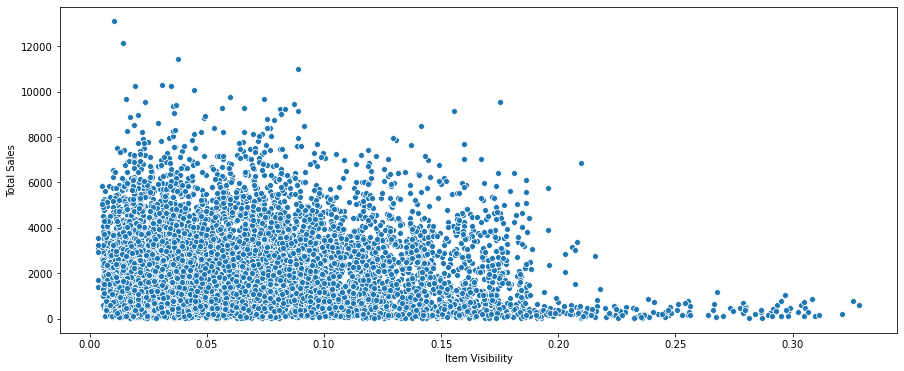

In [91]:
ax, fig = plt.subplots(figsize=(15,6))
#ax = big_mart.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().boxplot(x='Outlet_Type')
ax= sns.scatterplot(data = big_mart, x = 'Item_Visibility', y = 'Item_Outlet_Sales')
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Total Sales');

- Major of items has visibility below 0.2
- weak negative corrlation between Item visibility and Total Sales

## Q-7 Does Items with high price vlaue has high Visibility?

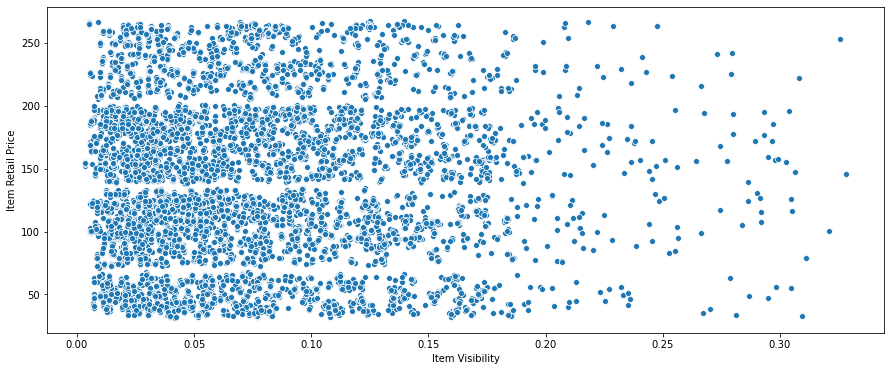

In [92]:
ax, fig = plt.subplots(figsize=(15,6))
#ax = big_mart.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().boxplot(x='Outlet_Type')
ax= sns.scatterplot(data = big_mart, x = 'Item_Visibility', y = 'Item_MRP')
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Item Retail Price');

- No relation between item price and its visibility

## Q-8 What is the realtion beween item price and its total sales?

''

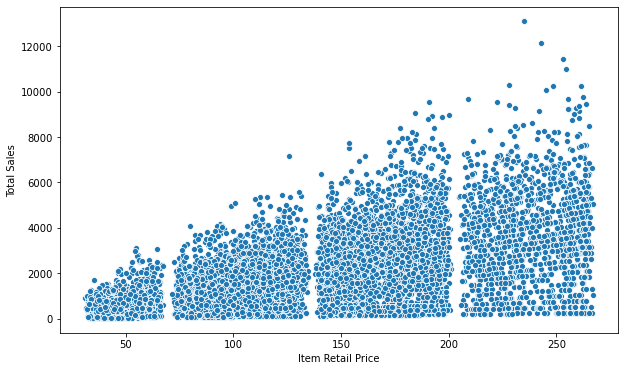

In [141]:
ax, fig = plt.subplots(figsize=(10,6))
ax= sns.scatterplot(data = big_mart, x = 'Item_MRP', y = 'Item_Outlet_Sales')
ax.set_xlabel('Item Retail Price')
ax.set_ylabel('Total Sales')
;

- The more price of the item the more total sales it achieve

## Q-9 Which Type people prefer to buy (Low Fat or Requalr)?

''

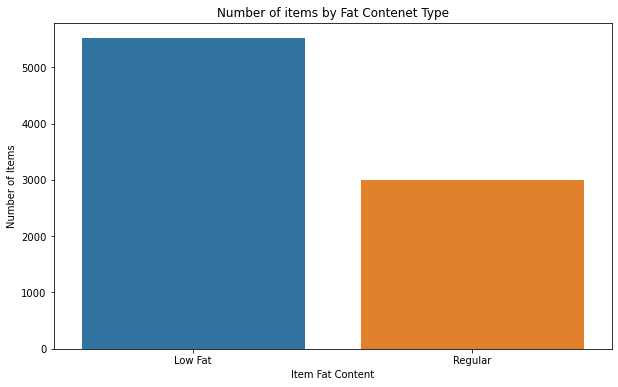

In [110]:
#check number of item by itd fat contenet
ax, fig = plt.subplots(figsize=(10,6))
ax= sns.countplot( x= big_mart['Item_Fat_Content'])
ax.set_xlabel('Item Fat Content')
ax.set_ylabel('Number of Items')
ax.set_title('Number of items by Fat Contenet Type')
;

''

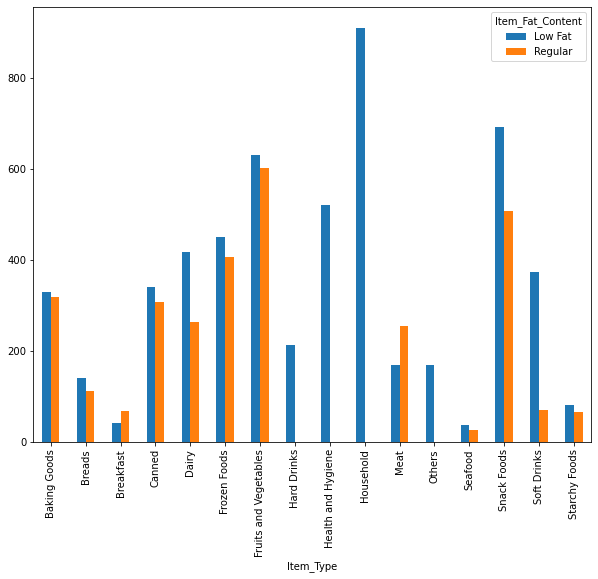

In [111]:
#check Fat content per item Type
big_mart.groupby(['Item_Type','Item_Fat_Content']).size().unstack().plot(kind='bar', figsize = (10,8))

;

- Product types (Household, Hard Dring and "Healthy and Hygiene") has unique type >> Low Fat
- Before comparing Fat Content we will exclude them

In [113]:
#exclude items with low fat only
comparable_items = big_mart[~big_mart['Item_Type'].isin(['Household', 'Hard Drinks', 'Health and Hygiene'])]

''

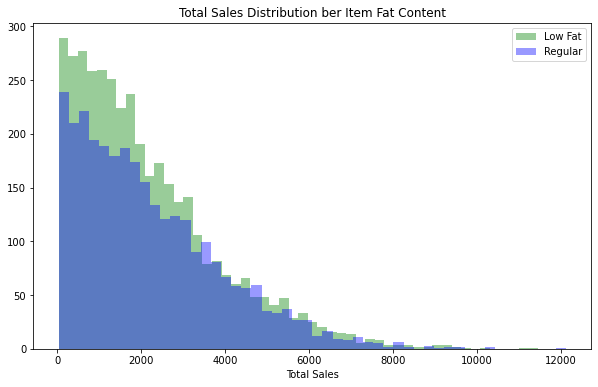

In [114]:
#Check 
fig, ax = plt.subplots(figsize = (10,6))


sns.distplot(comparable_items[comparable_items['Item_Fat_Content'] == 'Low Fat']['Item_Outlet_Sales'],bins = 50,kde = False, color = 'g')
sns.distplot(comparable_items[comparable_items['Item_Fat_Content'] == 'Regular']['Item_Outlet_Sales'],bins = 50,kde = False, color = 'b')
plt.legend(['Low Fat', 'Regular'])
ax.set_xlabel('Total Sales')
ax.set_title('Total Sales Distribution ber Item Fat Content')
#plt.hist()
;

- Low Fat items achieve more sales then general

## Show correlation between all data values with Total Sales

In [118]:
#Remove Item Identifier from the data set
df = big_mart.iloc[:,1:]
df.head()

,Item_Type,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Dairy,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Soft Drinks,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Meat,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Fruits and Vegetables,19.20,Regular,0.022911,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,Household,8.93,Low Fat,0.016164,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.022911,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.016164,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


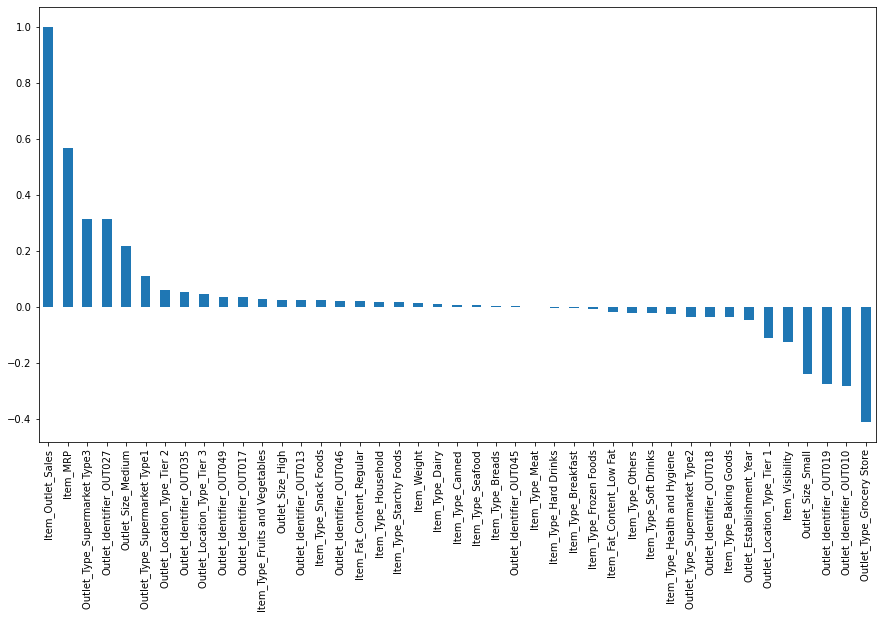

In [125]:
df_dummies.corr()['Item_Outlet_Sales'].sort_values(ascending = False).plot(kind ='bar', figsize = (15,8))

# Conclusion 

- Supermarket Type 3 has the most sales volume
- Location Tier 2 is achives sales equal to Tier 3 despite it sells less items
- Customers prefered Low Fat items on regural despite it is more expensive